# Analysis of Customer Response from Cold Call Dataset
***

### Background
We form part of a small group of data scientists who develop various models for companies and businesses who are looking to expand their knowledge in this field, but who currently are still outsourcing these activities instead of having a fully fledged in house team of people doing this for them, or who are in the process of developing their own in house capabilities.

### The Ask
The newly formed data science team from one of our clients have asked us to do an independent model development and buid by making use of the same underlying dataset which they have used in order for them to do a review and establish whether their inhouse developed model and approach (steps) are soundThe client has not been prescriptive regarding certain criteria, but has given us some guidelines for us to check against as we build out our model.

The main aim of the model is to classify whether a customer will take up the sales offer or not when we cold call them, so the better we discriminate between who will be more likely to take up the offer and who will not, can help our client to better optimise their internal efforts in terms of cold calling the right customer in order to convert those calls to sales.

The secondary aim, is to overlay the revenue / cost impacts based on our classification outcomes, in order to evaluate what the estimated impact will be on the financials by executing campaigns using this model for selection purposes and what it will yield and cost us.


### Feature Information
**Variable** : *Type* : Description <br> <br>
**Feature_ae_0** : *Numeric* : Customer - Age of the customer <br>
**Feature_dn_1** : *Numeric* : Telematics - Latest call duration (in seconds), measured during last sales call (only known after call has taken place) <br>
**Feature_cn_2** : *Numeric* : Telematics - Number of call attempts made to the customer <br>
**Feature_ps_3** : *Numeric* : Telematics - Number of days which passed since the last campaign (999 - no previous campaign) <br>
**Feature_ps_4** : *Numeric* : Telematics - Number of call attempts made to the customer for the previous campaign <br>
**Feature_ee_5** : *Numeric* : Macro variable - employment variation rate (Quarterly) <br>
**Feature_cx_6** : *Numeric* : Macro variable - consumer price index (Monthly) <br>
**Feature_cx_7** : *Numeric* : Macro variable - consumer confidence index (Monthly) <br>
**Feature_em_8** : *Numeric* : Macro variable - 3 month interbank rate (Quarterly) <br>
**Feature_nd_9** : *Numeric* : Macro variable - number of employees (Quarterly) <br>
**Feature_jd_10** : *Category* : Customer - type of employment <br>
**Feature_md_11** : *Category* : Customer - civil status <br>
**Feature_ed_12** : *Category* : Customer - highest level of education <br>
**Feature_dd_13** : *Category* : Customer - has some type of credit faclity in default <br>
**Feature_hd_14** : *Category* : Customer - has a home loan <br>
**Feature_ld_15** : *Category* : Customer - has a personal loan <br>
**Feature_cd_16** : *Category* : Customer - contact medium <br>
**Feature_md_17** : *Category* : Telematics - month when last contacted <br>
**Feature_dd_18** : *Category* : Telematics - day of the week when last contacted <br>
**Feature_pd_19** : *Category* : Performance - outcome of the previous campaign <br>
**Response** : *Binary* : Did the customer take up the offer 1 = Yes, 0 = No

***


### Preparation of Dataset

Let us start by loading our dataset, getting the numerical and categorical features, and analyzing our target variable.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv', sep='|')
df.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_11,Feature_ed_12,Feature_dd_13,Feature_hd_14,Feature_ld_15,Feature_cd_16,Feature_md_17,Feature_dd_18,Feature_pd_19,Response
0,57,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_2_y***s,Cat_0_c***r,Cat_6_m***y,Cat_1_m***n,Cat_0_f***e,0
1,55,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,Cat_1_m***d,Cat_7_u***n,Cat_1_u***n,Cat_2_y***s,Cat_0_n***o,Cat_1_t***e,Cat_6_m***y,Cat_2_t***u,Cat_1_n***t,0
2,33,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,...,Cat_1_m***d,Cat_2_b***y,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_6_m***y,Cat_0_f***i,Cat_0_f***e,0
3,36,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_1_t***e,Cat_4_j***n,Cat_0_f***i,Cat_1_n***t,0
4,27,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_0_f***i,Cat_1_n***t,0


In [3]:
numerical_features = ['Feature_ae_0','Feature_dn_1','Feature_cn_2','Feature_ps_3','Feature_ps_4',\
                      'Feature_ee_5','Feature_cx_6','Feature_cx_7', 'Feature_em_8','Feature_nd_9']
categorical_features = ['Feature_jd_10','Feature_md_11','Feature_ed_12','Feature_dd_13','Feature_hd_14', \
                        'Feature_ld_15','Feature_cd_16','Feature_md_17','Feature_dd_18','Feature_pd_19']
target = ['Response']

0    31070
1     3930
Name: Response, dtype: int64


<AxesSubplot:xlabel='Response', ylabel='count'>

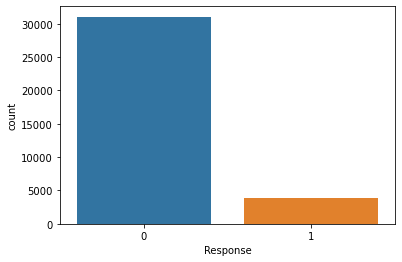

In [4]:
# Did the customer take up the offer 1 = Yes, 0 = No
print(df['Response'].value_counts())
Negative = sum(df['Response'] ==0)
Positive = sum(df['Response'] ==1)
sns.countplot(x='Response', data = df)

We can see here that the dataset is skewed towards rejection responses.

***

## Analysis of Numerical Data

Our objective in this section is to determine if there are features that need to be corrected. The approach would be:

- Visualize the box plot and the histogram of the numerical features. Determine if there are features which can be binned.
- Visualize the correlation heat map of the features. Determine if there are features which can be dropped.

In [5]:
df_num = df[numerical_features] # numerical
df_target = df[target]
df_numt = df_num.copy()
df_numt['Response'] = df_target.copy() # numerical with target
df_numt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Feature_ae_0  35000 non-null  int64  
 1   Feature_dn_1  35000 non-null  int64  
 2   Feature_cn_2  35000 non-null  int64  
 3   Feature_ps_3  35000 non-null  int64  
 4   Feature_ps_4  35000 non-null  int64  
 5   Feature_ee_5  35000 non-null  float64
 6   Feature_cx_6  35000 non-null  float64
 7   Feature_cx_7  35000 non-null  float64
 8   Feature_em_8  35000 non-null  float64
 9   Feature_nd_9  35000 non-null  float64
 10  Response      35000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 MB


In [6]:
df_num.isnull().sum()

Feature_ae_0    0
Feature_dn_1    0
Feature_cn_2    0
Feature_ps_3    0
Feature_ps_4    0
Feature_ee_5    0
Feature_cx_6    0
Feature_cx_7    0
Feature_em_8    0
Feature_nd_9    0
dtype: int64

Since there are no empty values, we can proceed on the visualization of the data.

### Visualization of Data

In [7]:
### Helper function for the plotting of the boxplot and histogram

def plot_box_hist(df, col, title): 
    fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (11, 8), gridspec_kw= {"height_ratios": (0.3, 1)})
    plt.subplots_adjust(hspace=0.3)
    mean=df[col].mean()
    median=df[col].median()
    
    
    sns.set_theme(style="whitegrid", palette="pastel")   
    sns.boxplot(x = col, y ='Response', order=[0,1], data = df, orient='h', ax=ax1)
    ax1.set_xlabel(title, fontsize=10)
    ax1.set_title(title + ' Box Plot', fontsize=10)
    ax1.axvline(mean, color='r', linestyle='--', label="Mean")
    ax1.axvline(median, color='g', linestyle='-', label="Median")
    ax1.tick_params(labelsize=10)

    sns.histplot(df[col], ax = ax2, kde=True)
    sns.despine(ax = ax2)
    ax2.set_xlabel(title, fontsize=10)
    ax2.set_ylabel('Occurence', fontsize=10)
    ax2.set_title(title + ' Histogram', fontsize=10)
    ax2.axvline(mean, color='r', linestyle='--', label="Mean")
    ax2.axvline(median, color='g', linestyle='--', label="Median")
    ax2.legend()
    ax2.tick_params(labelsize=10)

### Feature_ae_0 : Age of the Customer

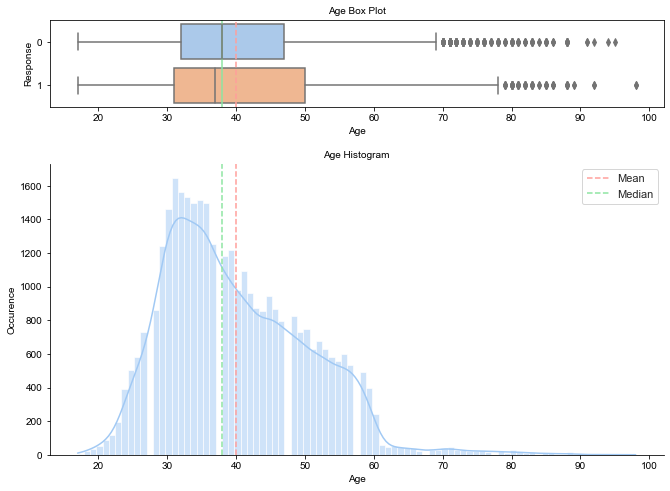

In [8]:
plot_box_hist(df_numt, 'Feature_ae_0', 'Age')

Since the age follows a smooth left side distribution, it doesn't need to be binned.

### Feature_dn_1: Latest Call Duration

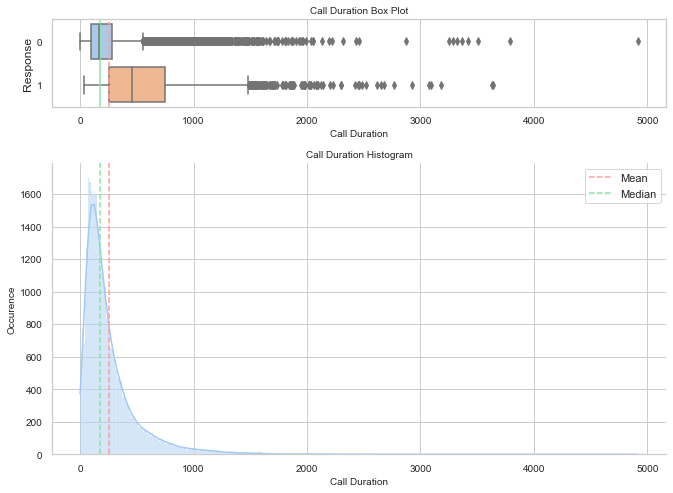

In [9]:
plot_box_hist(df_numt, 'Feature_dn_1', 'Call Duration')

### Feature_cn_2: Number of Call Attempts

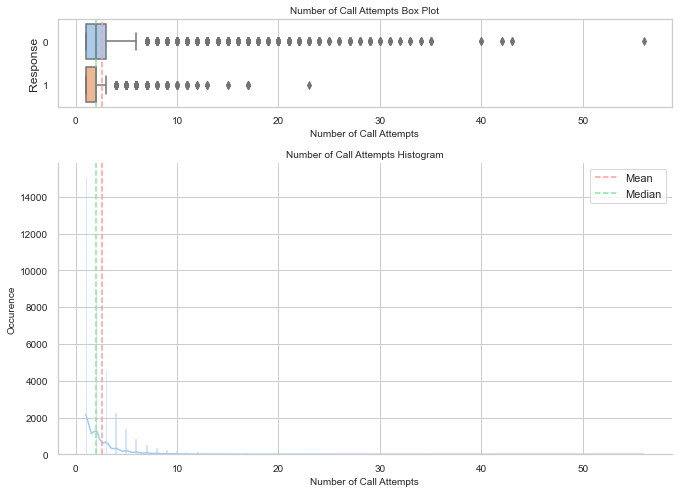

In [10]:
plot_box_hist(df_numt, 'Feature_cn_2', 'Number of Call Attempts')

### Feature_ps_3: Number of Days Passed

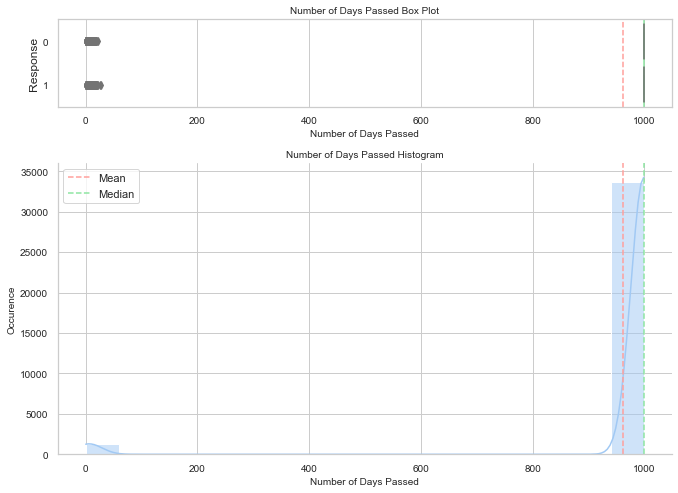

In [11]:
plot_box_hist(df_numt, 'Feature_ps_3', 'Number of Days Passed')

Notice that from the plots, majority of the days passed has a value of 999. This suggests that majority of the customers were called only for the first time. This means that this data will not offer that much information to our analysis and **Feature 3 can be dropped**.

### Feature_ps_4: Number of Call Attempts

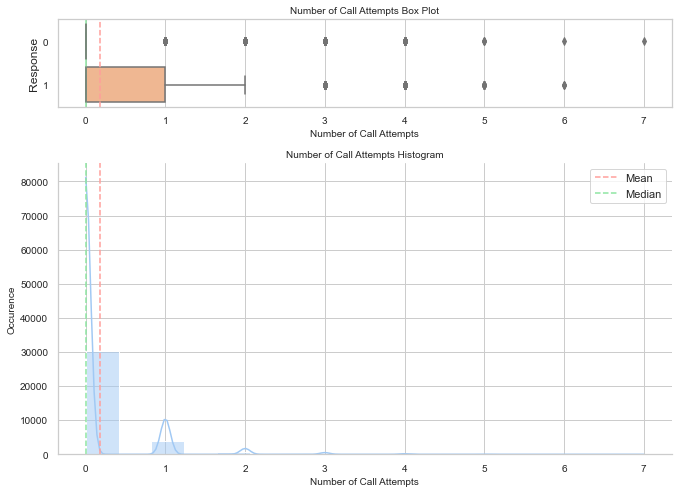

In [12]:
plot_box_hist(df_numt, 'Feature_ps_4', 'Number of Call Attempts')

This data shows that majority of previous call attempts has a value of 0. This supports our observation on the previous feature where we concluded that majority of the customers were called for the first time.

### Feature_ee_5: Employment Variation Rate

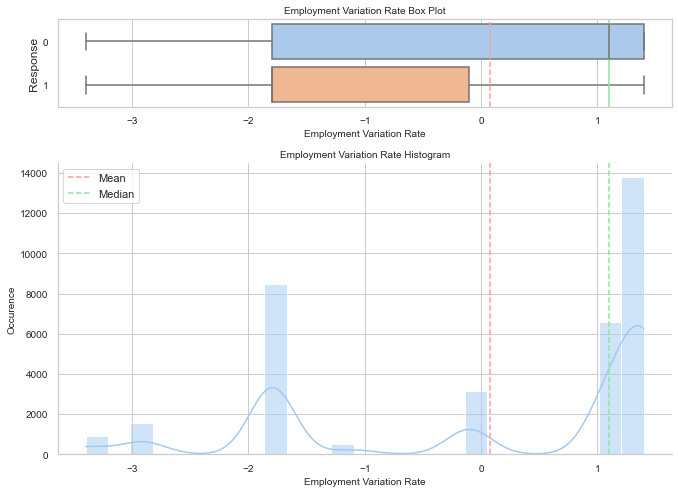

In [13]:
plot_box_hist(df_numt, 'Feature_ee_5', 'Employment Variation Rate')

### Feature_cx_6: Consumer Price Index

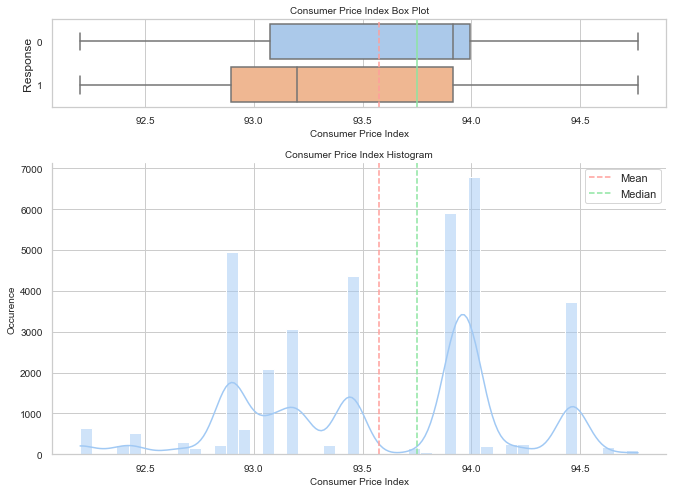

In [14]:
plot_box_hist(df_numt, 'Feature_cx_6', 'Consumer Price Index')

### Feature_cx_7: Consumer Confidence Index

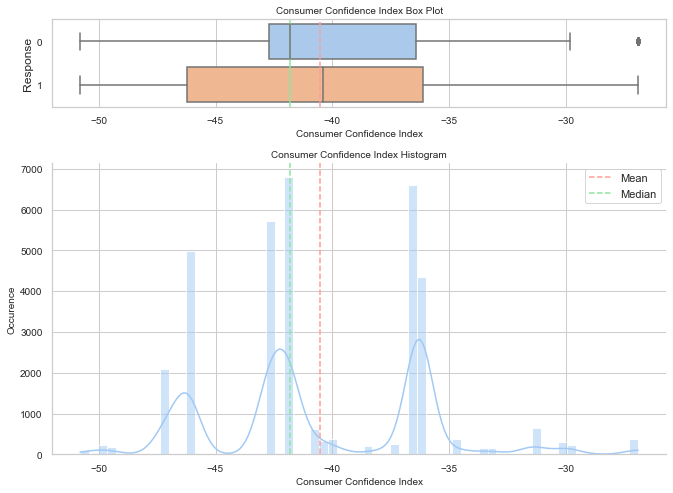

In [15]:
plot_box_hist(df_numt, 'Feature_cx_7', 'Consumer Confidence Index')

### Feature_em_8: 3 Month Interbank Rate

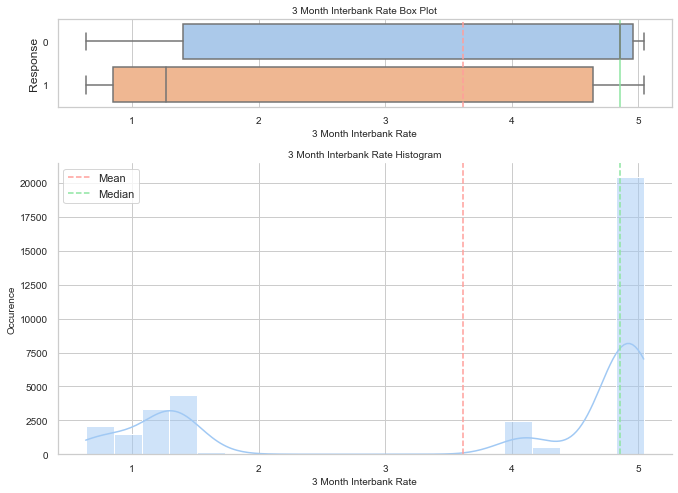

In [16]:
plot_box_hist(df_numt, 'Feature_em_8', '3 Month Interbank Rate')

### Feature_nd_9: Number of Employees

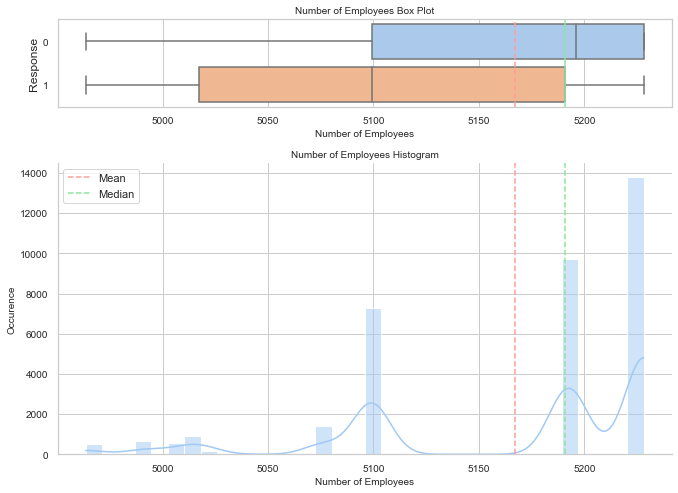

In [17]:
plot_box_hist(df_numt, 'Feature_nd_9', 'Number of Employees')

### Correlation Heat Map

Our objective here is to determine if there are features which are highly correlated (corr > 0.75). Highly correlated features will likely produce the same effect on the target variable.

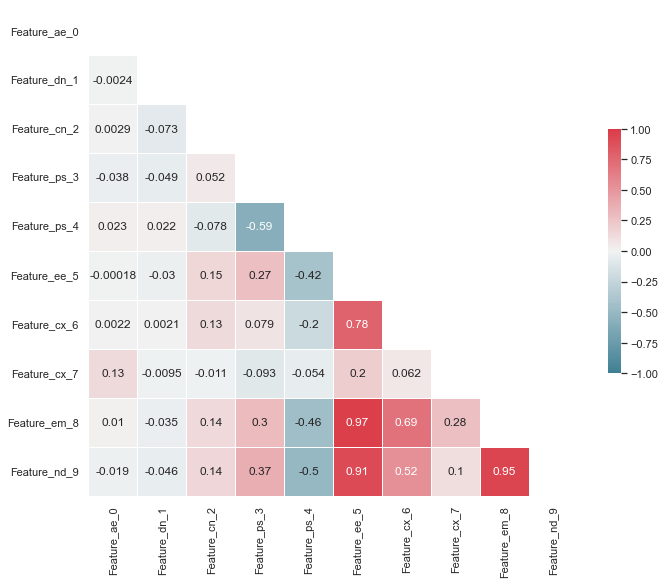

In [18]:
#Setting up correlation for our dataframe and passing it to seaborn heatmap function
sns.set(style="white")
corr = df_num.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});


Notice that Features 5, 6, 8 and 9 are highly correlated. This means that we can select one and drop the other three. In this case, let us select Feature 5, and **Features 6, 8 and 9 can be dropped**.
***

## Analysis of Categorical Data

Our objective in this section is to determine if there are features that need to be corrected. The approach would be:

1. Plot the countplots for each variable and see if there are negligible data
2. Solve for the mean response rate according to each value per feature. See if there are features which offer no variability.

In [19]:
df_cat = df[categorical_features]
df_target = df[target]
df_catt = df_cat.copy()
df_catt['Response'] = df_target.copy()
df_catt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Feature_jd_10  35000 non-null  object
 1   Feature_md_11  35000 non-null  object
 2   Feature_ed_12  35000 non-null  object
 3   Feature_dd_13  35000 non-null  object
 4   Feature_hd_14  35000 non-null  object
 5   Feature_ld_15  35000 non-null  object
 6   Feature_cd_16  35000 non-null  object
 7   Feature_md_17  35000 non-null  object
 8   Feature_dd_18  35000 non-null  object
 9   Feature_pd_19  35000 non-null  object
 10  Response       35000 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 2.9+ MB


### Visualizing the Categorical Data

In [20]:
### Helper function for the plotting of the boxplot and histogram

def plot_bar(df, col, title):
    sns.set_theme(style='darkgrid')
    sns.set(rc = {'figure.figsize':(8, 6)})
    job = sns.countplot(x=col, data = df, hue = "Response", order = df[col].value_counts().index)
    job.tick_params(axis='x', rotation=90)
    plt.xlabel(title)
    plt.title(title + ' Distribution')
    plt.show()

### Feature_jd_10: Type of Employment

Cat_0_a***.     8866
Cat_1_b***r     7858
Cat_9_t***n     5737
Cat_7_s***s     3353
Cat_4_m***t     2489
Cat_5_r***d     1466
Cat_2_e***r     1256
Cat_6_s***d     1215
Cat_3_h***d      901
Cat_10_u***d     839
Cat_8_s***t      727
Cat_11_u***n     293
Name: Feature_jd_10, dtype: int64


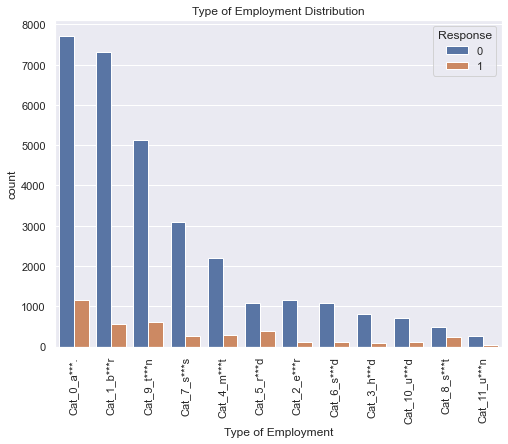

In [21]:
# Customer - type of employment
print(df['Feature_jd_10'].value_counts())
plot_bar(df_catt, 'Feature_jd_10', 'Type of Employment')

### Feature_md_11: Civil Status

Cat_1_m***d    21212
Cat_2_s***e     9816
Cat_0_d***d     3903
Cat_3_u***n       69
Name: Feature_md_11, dtype: int64


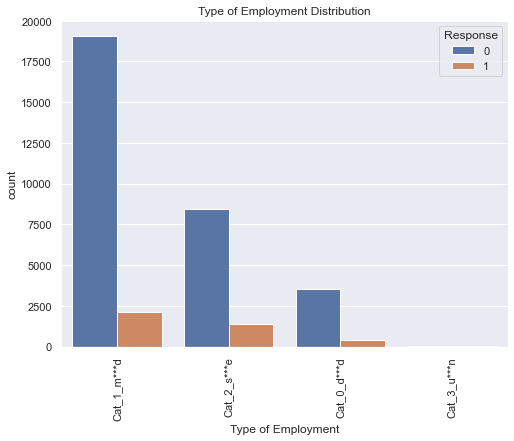

In [22]:
# Customer - civil status
print(df['Feature_md_11'].value_counts())
plot_bar(df_catt, 'Feature_md_11', 'Type of Employment')

### Feature_ed_12: Highest Level of Education

Cat_6_u***e    10312
Cat_3_h***l     8042
Cat_2_b***y     5176
Cat_5_p***e     4480
Cat_0_b***y     3533
Cat_1_b***y     1963
Cat_7_u***n     1477
Cat_4_i***e       17
Name: Feature_ed_12, dtype: int64


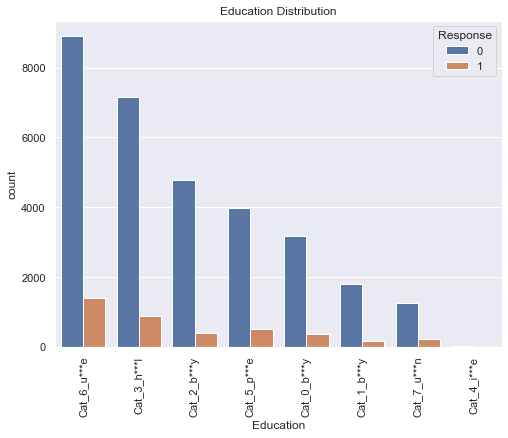

In [23]:
# Customer - highest level of education
print(df['Feature_ed_12'].value_counts())
plot_bar(df_catt, 'Feature_ed_12', 'Education')

Note that there is very few data value of <code>Cat_4_i***e</code>.

### Feature_dd_13: Has Default

Cat_0_n***o    27674
Cat_1_u***n     7323
Cat_2_y***s        3
Name: Feature_dd_13, dtype: int64


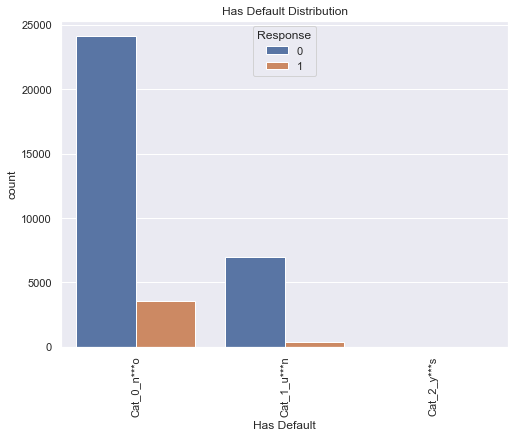

In [24]:
# Customer - has some type of credit faclity in default
print(df['Feature_dd_13'].value_counts())
plot_bar(df_catt, 'Feature_dd_13', 'Has Default')

Note that there is very few data value of <code>Cat_2_y***s</code>.

### Feature_hd_14: Home Loan

Cat_2_y***s    18292
Cat_0_n***o    15869
Cat_1_u***n      839
Name: Feature_hd_14, dtype: int64


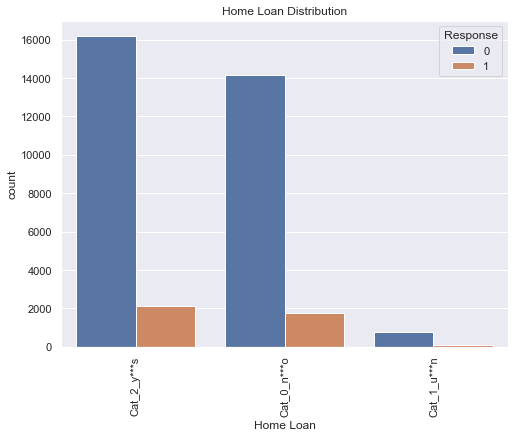

In [25]:
# Customer - has a home loan
print(df['Feature_hd_14'].value_counts())
plot_bar(df_catt, 'Feature_hd_14', 'Home Loan')

### Feature_ld_15: Personal Loan

Cat_0_n***o    28846
Cat_2_y***s     5315
Cat_1_u***n      839
Name: Feature_ld_15, dtype: int64


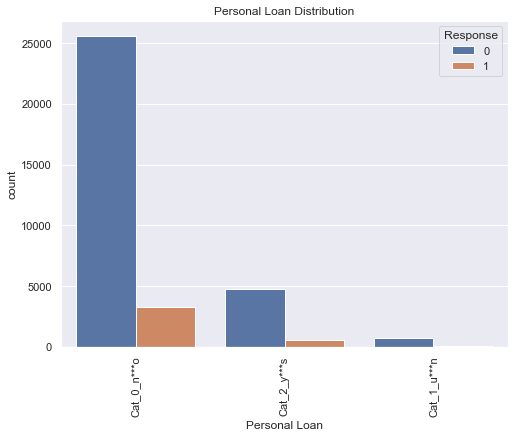

In [26]:
# Customer - has a personal loan
print(df['Feature_ld_15'].value_counts())
plot_bar(df_catt, 'Feature_ld_15', 'Personal Loan')

### Feature_cd_16: Contact Medium

Cat_0_c***r    22240
Cat_1_t***e    12760
Name: Feature_cd_16, dtype: int64


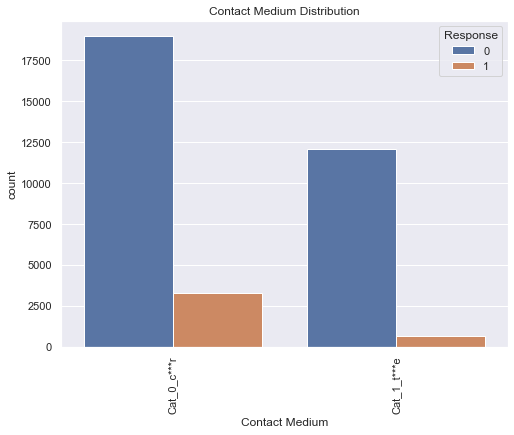

In [27]:
# Customer - contact medium
print(df['Feature_cd_16'].value_counts())
plot_bar(df_catt, 'Feature_cd_16', 'Contact Medium')

### Feature_md_17: Month Last Contacted

Cat_6_m***y    11739
Cat_3_j***l     6125
Cat_1_a***g     5193
Cat_4_j***n     4539
Cat_7_n***v     3482
Cat_0_a***r     2231
Cat_8_o***t      603
Cat_9_s***p      478
Cat_5_m***r      457
Cat_2_d***c      153
Name: Feature_md_17, dtype: int64


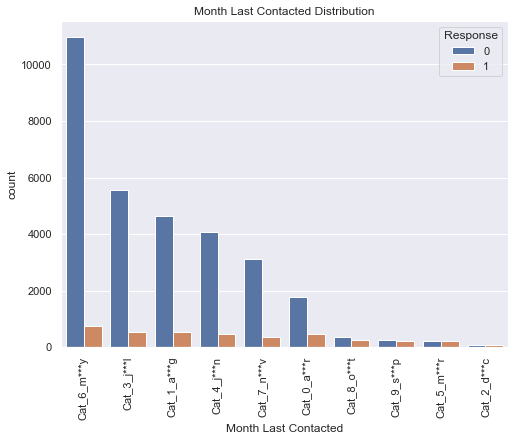

In [28]:
# Telematics - month when last contacted
print(df['Feature_md_17'].value_counts())
plot_bar(df_catt, 'Feature_md_17', 'Month Last Contacted')

### Feature_dd_18: Day of the Week Last Contacted

Cat_2_t***u    7358
Cat_1_m***n    7245
Cat_4_w***d    6898
Cat_3_t***e    6886
Cat_0_f***i    6613
Name: Feature_dd_18, dtype: int64


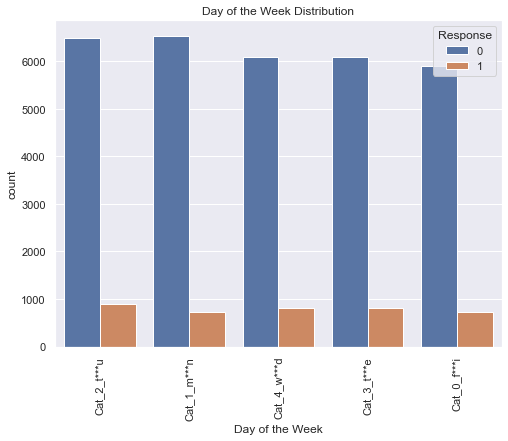

In [29]:
# Telematics - day of the week when last contacted
print(df['Feature_dd_18'].value_counts())
plot_bar(df_catt, 'Feature_dd_18', 'Day of the Week')

### Feature_pd_19: Category Performance

Cat_1_n***t    30192
Cat_0_f***e     3646
Cat_2_s***s     1162
Name: Feature_pd_19, dtype: int64


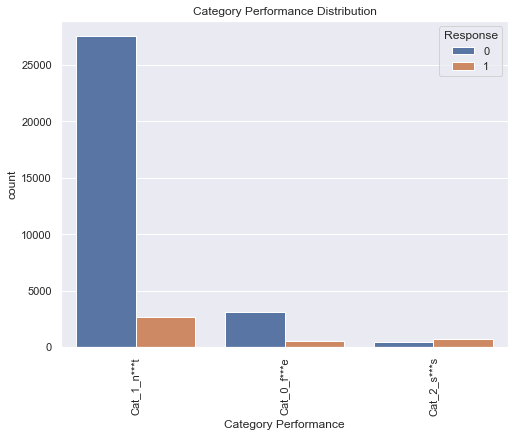

In [30]:
# Performance - outcome of the previous campaign
print(df['Feature_pd_19'].value_counts())
plot_bar(df_catt, 'Feature_pd_19', 'Category Performance')

***

### Analysis of Response Rate per Feature

Our goal here is to figure out if there are categorical features which don't offer that much information gain (small variation in the mean result) towards the target data.

In [31]:
df[['Feature_jd_10', 'Response']].groupby(['Feature_jd_10'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Feature_jd_10,Response
10,Cat_8_s***t,0.317744
7,Cat_5_r***d,0.254434
1,Cat_10_u***d,0.143027
0,Cat_0_a***.,0.129596
6,Cat_4_m***t,0.112897
11,Cat_9_t***n,0.107547
5,Cat_3_h***d,0.106548
2,Cat_11_u***n,0.102389
8,Cat_6_s***d,0.102058
4,Cat_2_e***r,0.082803


In [32]:
df[['Feature_md_11', 'Response']].groupby(['Feature_md_11'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Feature_md_11,Response
3,Cat_3_u***n,0.159420
2,Cat_2_s***e,0.139976
0,Cat_0_d***d,0.101973
1,Cat_1_m***d,0.101216


In [33]:
df[['Feature_ed_12', 'Response']].groupby(['Feature_ed_12'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Feature_ed_12,Response
4,Cat_4_i***e,0.235294
7,Cat_7_u***n,0.142857
6,Cat_6_u***e,0.136152
5,Cat_5_p***e,0.111161
3,Cat_3_h***l,0.109301
0,Cat_0_b***y,0.104161
1,Cat_1_b***y,0.082527
2,Cat_2_b***y,0.078053


In [34]:
df[['Feature_dd_13', 'Response']].groupby(['Feature_dd_13'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Feature_dd_13,Response
0,Cat_0_n***o,0.128279
1,Cat_1_u***n,0.051891
2,Cat_2_y***s,0.000000


In [35]:
df[['Feature_hd_14', 'Response']].groupby(['Feature_hd_14'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Feature_hd_14,Response
2,Cat_2_y***s,0.115132
0,Cat_0_n***o,0.109459
1,Cat_1_u***n,0.103695


In [36]:
df[['Feature_ld_15', 'Response']].groupby(['Feature_ld_15'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Feature_ld_15,Response
0,Cat_0_n***o,0.113257
2,Cat_2_y***s,0.108373
1,Cat_1_u***n,0.103695


In [37]:
df[['Feature_cd_16', 'Response']].groupby(['Feature_cd_16'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Feature_cd_16,Response
0,Cat_0_c***r,0.147077
1,Cat_1_t***e,0.051646


In [38]:
df[['Feature_md_17', 'Response']].groupby(['Feature_md_17'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Feature_md_17,Response
5,Cat_5_m***r,0.514223
2,Cat_2_d***c,0.470588
9,Cat_9_s***p,0.453975
8,Cat_8_o***t,0.424544
0,Cat_0_a***r,0.206186
1,Cat_1_a***g,0.106682
4,Cat_4_j***n,0.104869
7,Cat_7_n***v,0.102240
3,Cat_3_j***l,0.090122
6,Cat_6_m***y,0.064060


In [39]:
df[['Feature_dd_18', 'Response']].groupby(['Feature_dd_18'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Feature_dd_18,Response
2,Cat_2_t***u,0.120005
3,Cat_3_t***e,0.117630
4,Cat_4_w***d,0.116411
0,Cat_0_f***i,0.108574
1,Cat_1_m***n,0.098827


In [40]:
df[['Feature_pd_19', 'Response']].groupby(['Feature_pd_19'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Feature_pd_19,Response
2,Cat_2_s***s,0.645439
0,Cat_0_f***e,0.140154
1,Cat_1_n***t,0.088401


From these tables, we can observe that Features 14, 15 and 18 yield statitistically equal responses. This means that these features have very little significance in our analysis. Hence, **Features 14, 15 and 18 can be dropped**.

***
### Feature Engineering

1. Drop the features that were identified to be not significant
2. Replace the row values with the corresponding mode in their respective features
3. Map features with binary variables, while perform one hot encoding on features with three or more variables.

#### 1. Drop Features

In [41]:
# Drop the identified columns
dropcol_num = ['Feature_ps_3', 'Feature_cx_6', 'Feature_em_8', 'Feature_nd_9']
dropcol_cat = ['Feature_md_11', 'Feature_hd_14', 'Feature_ld_15', 'Feature_dd_18']
df2 = df.drop(dropcol_num, axis = 1)
df2.drop(dropcol_cat, axis = 1, inplace = True)
df2.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_4,Feature_ee_5,Feature_cx_7,Feature_jd_10,Feature_ed_12,Feature_dd_13,Feature_cd_16,Feature_md_17,Feature_pd_19,Response
0,57,371,1,1,-1.8,-46.2,Cat_9_t***n,Cat_3_h***l,Cat_0_n***o,Cat_0_c***r,Cat_6_m***y,Cat_0_f***e,0
1,55,285,2,0,1.1,-36.4,Cat_11_u***n,Cat_7_u***n,Cat_1_u***n,Cat_1_t***e,Cat_6_m***y,Cat_1_n***t,0
2,33,52,1,1,-1.8,-46.2,Cat_1_b***r,Cat_2_b***y,Cat_0_n***o,Cat_0_c***r,Cat_6_m***y,Cat_0_f***e,0
3,36,355,4,0,1.4,-41.8,Cat_0_a***.,Cat_3_h***l,Cat_0_n***o,Cat_1_t***e,Cat_4_j***n,Cat_1_n***t,0
4,27,189,2,0,1.4,-42.7,Cat_3_h***d,Cat_3_h***l,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_1_n***t,0


#### 2. Replace Rows with Mode

In [42]:
# Replace the identified row values
df2["Feature_ed_12"].replace(["Cat_4_i***e"],df2["Feature_ed_12"].mode(),inplace = True)
df2["Feature_dd_13"].replace(["Cat_2_y***s"],df2["Feature_dd_13"].mode(),inplace = True)
df2.describe()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_4,Feature_ee_5,Feature_cx_7,Response
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,40.030571,257.838400,2.562200,0.173714,0.080749,-40.519114,0.112286
std,10.428141,258.587889,2.767424,0.495005,1.571101,4.619948,0.315722
min,17.000000,0.000000,1.000000,0.000000,-3.400000,-50.800000,0.000000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,-42.700000,0.000000
50%,38.000000,179.000000,2.000000,0.000000,1.100000,-41.800000,0.000000
75%,47.000000,318.000000,3.000000,0.000000,1.400000,-36.400000,0.000000
max,98.000000,4918.000000,56.000000,7.000000,1.400000,-26.900000,1.000000


#### 3. Encoding

Use mapping for features with 2 unique variables, while one hot encoding for features with more than 2 unique variables.

In [43]:
# Statistics of categorical features
df2.describe(include=['O'])

,Feature_jd_10,Feature_ed_12,Feature_dd_13,Feature_cd_16,Feature_md_17,Feature_pd_19
count,35000,35000,35000,35000,35000,35000
unique,12,7,2,2,10,3
top,Cat_0_a***.,Cat_6_u***e,Cat_0_n***o,Cat_0_c***r,Cat_6_m***y,Cat_1_n***t
freq,8866,10329,27677,22240,11739,30192


In [44]:
df2['Feature_dd_13'].value_counts()

Cat_0_n***o    27677
Cat_1_u***n     7323
Name: Feature_dd_13, dtype: int64

In [45]:
df2['Feature_dd_13'] = df2['Feature_dd_13'].map({'Cat_0_n***o': 1, 'Cat_1_u***n': 0})

In [46]:
df2['Feature_cd_16'].value_counts()

Cat_0_c***r    22240
Cat_1_t***e    12760
Name: Feature_cd_16, dtype: int64

In [47]:
df2['Feature_cd_16'] = df2['Feature_cd_16'].map({'Cat_0_c***r': 1, 'Cat_1_t***e': 0})

In [48]:
df2.describe(include=['O'])

,Feature_jd_10,Feature_ed_12,Feature_md_17,Feature_pd_19
count,35000,35000,35000,35000
unique,12,7,10,3
top,Cat_0_a***.,Cat_6_u***e,Cat_6_m***y,Cat_1_n***t
freq,8866,10329,11739,30192


In [49]:
df3 = pd.get_dummies(df2, drop_first = True)

In [50]:
df3.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_4,Feature_ee_5,Feature_cx_7,Feature_dd_13,Feature_cd_16,Response,Feature_jd_10_Cat_10_u***d,...,Feature_md_17_Cat_2_d***c,Feature_md_17_Cat_3_j***l,Feature_md_17_Cat_4_j***n,Feature_md_17_Cat_5_m***r,Feature_md_17_Cat_6_m***y,Feature_md_17_Cat_7_n***v,Feature_md_17_Cat_8_o***t,Feature_md_17_Cat_9_s***p,Feature_pd_19_Cat_1_n***t,Feature_pd_19_Cat_2_s***s
0,57,371,1,1,-1.8,-46.2,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,55,285,2,0,1.1,-36.4,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,33,52,1,1,-1.8,-46.2,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,36,355,4,0,1.4,-41.8,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,27,189,2,0,1.4,-42.7,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [51]:
y = df3['Response']
X = df3.drop('Response',axis = 1)

We now have our feature dataset <code>X</code> and out target dataset <code>y</code>

# Model Creation

1. Split the dataset into the train and test set. Ensure a balance of the target y.
2. Scale the feature dataset
3. Create and compare the performance of models: 
* Logistic Regression
* KNN
* SVC
* Decision Tree
* Random Forest
* XGBoost


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [54]:
### Function to plot the confusion matrix

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt='g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Rejected', 'Accepted'])
    ax.yaxis.set_ticklabels(['Rejected', 'Accepted'])

In [55]:
### Function to output the metrics for the model

def classifier(clf, x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )
    print()

In [56]:
# Function to solve the TNR

def solve_score(clf, x_train, x_test, y_train, y_test):
    y_test_pred = clf.predict(x_test)
    #y_train_pred = clf.predict(x_train)
    
    cm = confusion_matrix(y_test, y_test_pred)
    
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    TN = cm[0][0]
    TNR = TN/(TN+FP)
    TPR = TP/(TP+FN)
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    #print()
    #print("True Positive Rate (TPR) is:", TPR) #Recall/Sensitivity
    #print("True Negative Rate (TNR) is:", TNR) #Specificity
    #print()
    #print("Positive Predictive Value (PPV) is:", PPV) #Precision
    #print("Negative Predictive Value (NPV) is:", NPV) 
    return (TNR, TPR)

### 1. Logistic Regression

Train accuracy is: 0.9093877551020408
Test accuracy is: 0.9097142857142857

Train ROC is: 0.6862111878560823
Test ROC is: 0.6879827296320956

The weighted precision is: 0.8979729583241457
The weighted recall is: 0.9097142857142857
The weighted f1 score is: 0.8998059942569994


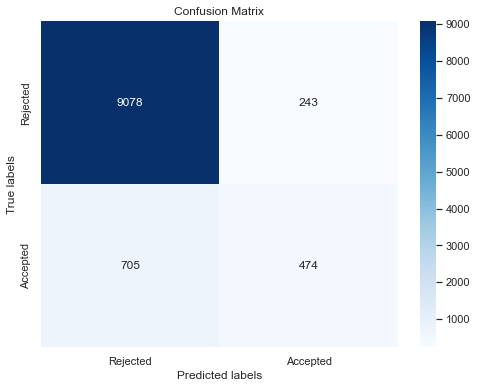

In [57]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
lr_train_score= lr.score(X_train, y_train)
lr_test_score= lr.score(X_test, y_test)
classifier(lr, X_train, X_test, y_train, y_test)

yhat = lr.predict(X_test)
plot_confusion_matrix(y_test,yhat)
lr_rep = classification_report(y_test, yhat, output_dict=True)
print("The weighted precision is:",lr_rep['weighted avg']['precision'])
print("The weighted recall is:", lr_rep['weighted avg']['recall'])
print("The weighted f1 score is:",lr_rep['weighted avg']['f1-score'])

### 2. K-Nearest Neighbors

The weighted precision is: 0.8862974653923792
The weighted recall is: 0.9028571428571428
The weighted f1 score is: 0.8844206779639547


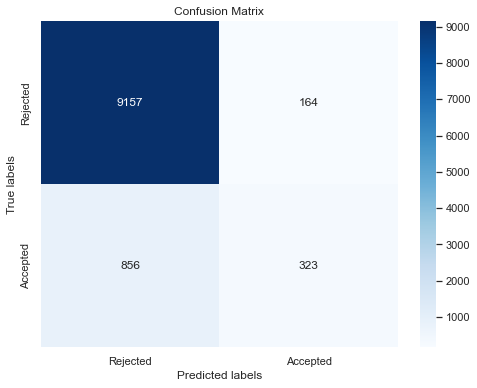

In [58]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_train_score= knn.score(X_train, y_train)
knn_test_score= knn.score(X_test, y_test)
#classifier(knn, X_train, X_test, y_train, y_test)

yhat = knn.predict(X_test)
plot_confusion_matrix(y_test,yhat)
knn_rep = classification_report(y_test, yhat, output_dict=True)
print("The weighted precision is:",knn_rep['weighted avg']['precision'])
print("The weighted recall is:", knn_rep['weighted avg']['recall'])
print("The weighted f1 score is:",knn_rep['weighted avg']['f1-score'])

### 3. Support Vector Machine

The weighted precision is: 0.869036437014936
The weighted recall is: 0.8708571428571429
The weighted f1 score is: 0.8699308625436442


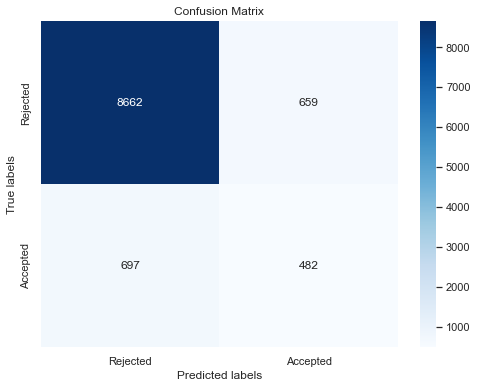

In [59]:
svm = SVC(kernel = 'sigmoid')
svm.fit(X_train, y_train)
svm_train_score= svm.score(X_train, y_train)
svm_test_score= svm.score(X_test, y_test)
#classifier(svm, X_train, X_test, y_train, y_test)

yhat = svm.predict(X_test)
plot_confusion_matrix(y_test,yhat)
svm_rep = classification_report(y_test, yhat, output_dict=True)
print("The weighted precision is:",svm_rep['weighted avg']['precision'])
print("The weighted recall is:", svm_rep['weighted avg']['recall'])
print("The weighted f1 score is:",svm_rep['weighted avg']['f1-score'])

### 4. Decision Tree

The weighted precision is: 0.8866822705235321
The weighted recall is: 0.8846666666666667
The weighted f1 score is: 0.8856478683660185


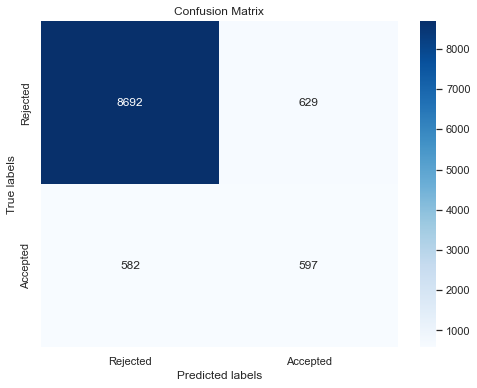

In [60]:
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(X_train, y_train)
tree_train_score= tree.score(X_train, y_train)
tree_test_score= tree.score(X_test, y_test)
#classifier(tree, X_train, X_test, y_train, y_test)

yhat = tree.predict(X_test)
plot_confusion_matrix(y_test,yhat)
tree_rep = classification_report(y_test, yhat, output_dict=True)
print("The weighted precision is:",tree_rep['weighted avg']['precision'])
print("The weighted recall is:", tree_rep['weighted avg']['recall'])
print("The weighted f1 score is:",tree_rep['weighted avg']['f1-score'])


### 5. Random Forest

The weighted precision is: 0.9071537443609023
The weighted recall is: 0.9124761904761904
The weighted f1 score is: 0.9092974516954289


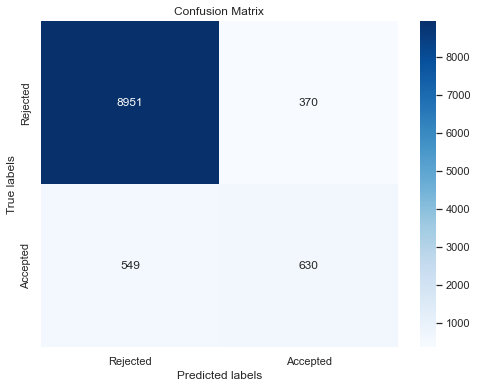

In [61]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfc_train_score= rfc.score(X_train, y_train)
rfc_test_score= rfc.score(X_test, y_test)
#classifier(rfc, X_train, X_test, y_train, y_test)

yhat = rfc.predict(X_test)
plot_confusion_matrix(y_test,yhat)
rfc_rep = classification_report(y_test, yhat, output_dict=True)
print("The weighted precision is:",rfc_rep['weighted avg']['precision'])
print("The weighted recall is:", rfc_rep['weighted avg']['recall'])
print("The weighted f1 score is:",rfc_rep['weighted avg']['f1-score'])

### 6. XGBoost

[03:27:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The weighted precision is: 0.9047599720248916
The weighted recall is: 0.9102857142857143
The weighted f1 score is: 0.907007493679995


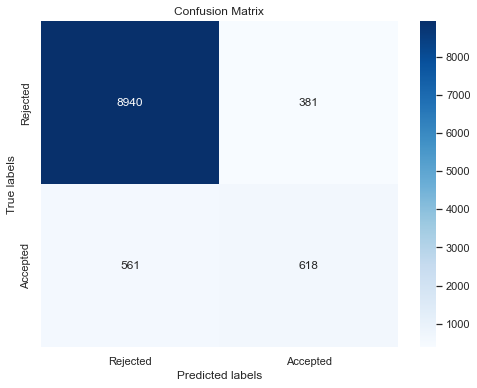

In [62]:
xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(X_train, y_train)
xgb_train_score= xgb.score(X_train, y_train)
xgb_test_score= xgb.score(X_test, y_test)
#classifier(xgb, X_train, X_test, y_train, y_test)

yhat = xgb.predict(X_test)
plot_confusion_matrix(y_test,yhat)
xgb_rep = classification_report(y_test, yhat, output_dict=True)
print("The weighted precision is:",xgb_rep['weighted avg']['precision'])
print("The weighted recall is:", xgb_rep['weighted avg']['recall'])
print("The weighted f1 score is:",xgb_rep['weighted avg']['f1-score'])

### Model Selection

In [63]:
modellist = [lr, knn, svm, tree, rfc, xgb]
stringname = ['lr', 'knn', 'svm', 'tree', 'rfc', 'xgb']
length = len(stringname)
dict_score = dict()
for i in range(length):
    dict_score[stringname[i]] = solve_score(modellist[i], X_train, X_test, y_train, y_test)

In [64]:
print(dict_score)

{'lr': (0.9739298358545221, 0.4020356234096692), 'knn': (0.9824053213174552, 0.273960983884648), 'svm': (0.9292994313914816, 0.40882103477523324), 'tree': (0.9325179701748739, 0.5063613231552163), 'rfc': (0.9603046883381612, 0.5343511450381679), 'xgb': (0.9591245574509173, 0.5241730279898219)}


In [65]:
dict_recall = dict()
for mod in dict_score:
    TNR, TPR = dict_score[mod]
    aveRecall = TNR*(Negative/(Negative+Positive)) + TPR*(Positive/(Negative+Positive))
    dict_recall[mod] = aveRecall

dict_recall

### ALTERNATIVELY ###
# x = classification_report(y_test, yhat, output_dict=True)
# aveRecall = x['weighted avg']['recall']

{'lr': 0.9097142857142857,
 'knn': 0.9028571428571428,
 'svm': 0.8708571428571429,
 'tree': 0.8846666666666666,
 'rfc': 0.9124761904761904,
 'xgb': 0.9102857142857143}

In [66]:
lr_f1 = round(float(lr_rep['weighted avg']['f1-score']),5)
knn_f1 = round(float(knn_rep['weighted avg']['f1-score']),5)
svm_f1 = round(float(svm_rep['weighted avg']['f1-score']),5)
tree_f1 = round(float(tree_rep['weighted avg']['f1-score']),5)
rfc_f1 = round(float(rfc_rep['weighted avg']['f1-score']),5)
xgb_f1 = round(float(xgb_rep['weighted avg']['f1-score']),5)

print("Model\t\tAccuracy\tTestAccuracy\tAverage F1-Score")
print("LogReg\t\t{}\t\t{}\t\t{}".format(lr_train_score.round(3), lr_test_score.round(3), lr_f1))
print("KNN\t\t{}\t\t{}\t\t{}".format(knn_train_score.round(3), knn_test_score.round(3), knn_f1))
print("SVM\t\t{}\t\t{}\t\t{}".format(svm_train_score.round(3), svm_test_score.round(3), svm_f1))
print("Tree\t\t{}\t\t{}\t\t{}".format(tree_train_score.round(3), tree_test_score.round(3), tree_f1))
print("RFC\t\t{}\t\t{}\t\t{}".format(rfc_train_score.round(3), rfc_test_score.round(3), rfc_f1))
print("XGB\t\t{}\t\t{}\t\t{}".format(xgb_train_score.round(3), xgb_test_score.round(3), xgb_f1))

comparison = {}

comparison['LogReg'] = {'Accuracy': lr_train_score, 'TestAccuracy': lr_test_score, 'AveF1Score' : lr_f1}
comparison['KNN'] = {'Accuracy': knn_train_score, 'TestAccuracy': knn_test_score, 'AveF1Score' : knn_f1}
comparison['SVM'] = {'Accuracy': svm_train_score, 'TestAccuracy': svm_test_score, 'AveF1Score' : svm_f1}
comparison['Tree'] = {'Accuracy': tree_train_score, 'TestAccuracy': tree_test_score, 'AveF1Score' : tree_f1}
comparison['RFC'] = {'Accuracy': rfc_train_score, 'TestAccuracy': rfc_test_score, 'AveF1Score' : rfc_f1}
comparison['XGB'] = {'Accuracy': xgb_train_score, 'TestAccuracy': xgb_test_score, 'AveF1Score' : xgb_f1}

Model		Accuracy	TestAccuracy	Average F1-Score
LogReg		0.909		0.91		0.89981
KNN		0.911		0.903		0.88442
SVM		0.867		0.871		0.86993
Tree		1.0		0.885		0.88565
RFC		1.0		0.912		0.9093
XGB		0.956		0.91		0.90701


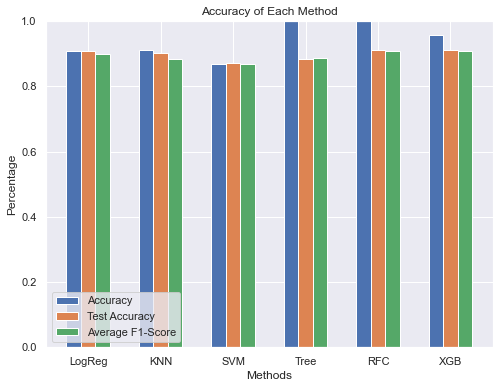

In [67]:
x = []
y1 = []
y2 = []
y3 = []
for meth in comparison.keys():
    x.append(meth)    
    y1.append(comparison[meth]['Accuracy'])
    y2.append(comparison[meth]['TestAccuracy'])
    y3.append(comparison[meth]['AveF1Score'])
    

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y1, 0.2, label = 'Accuracy')
plt.bar(x_axis , y2, 0.2, label = 'Test Accuracy')
plt.bar(x_axis + 0.2, y3, 0.2, label = 'Average F1-Score')

plt.ylim([0,1])
plt.xticks(x_axis, x)

plt.xlabel("Methods")
plt.ylabel("Percentage")
plt.title("Accuracy of Each Method")
plt.legend(loc='lower left')
plt.show()

### Interpretation

The different models yield different results to the different metrics. Based on the analysis, we can select the **Random Forest Classifier** as our model since it has the highest accuracy, weighted precision, weighted recall and weighted f1 score.

***

## Feature Importance

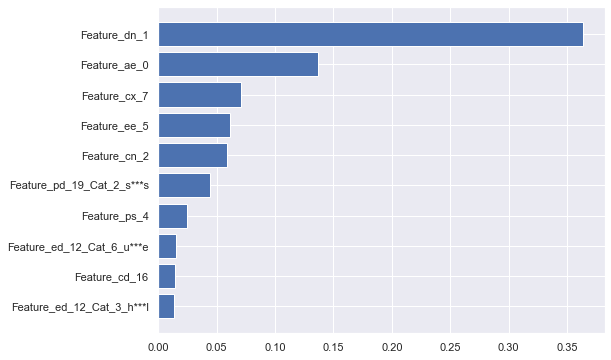

In [68]:
feat_dictionary = dict(zip(X.columns, rfc.feature_importances_))

feat_dictionary_sorted = dict(sorted(feat_dictionary.items(), key=lambda x: x[1], reverse=False))
topN = 10

names = list(feat_dictionary_sorted.keys())[-1*topN:]
values = list(feat_dictionary_sorted.values())[-1*topN:]

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.barh(range(topN), values, tick_label=names)
plt.show()


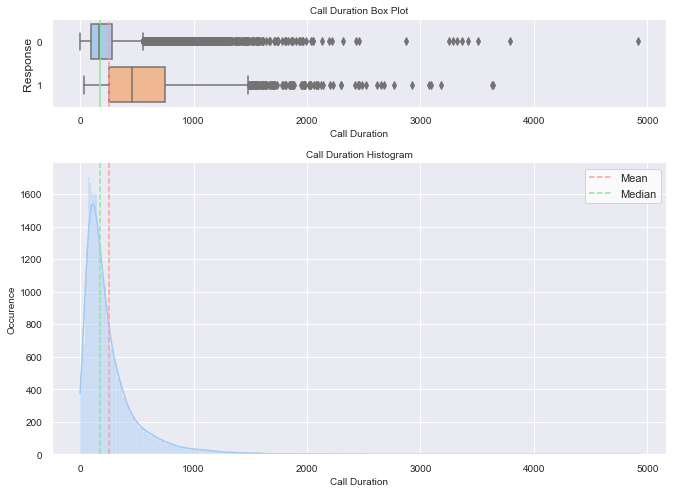

In [69]:
plot_box_hist(df_numt, 'Feature_dn_1', 'Call Duration')

### Conclusion

In this graph, we can observe that <code>Feature_dn_1</code> is the most significant feature in the dataset. This can be further justified by the boxplot and histogram plot shown below. Notice that the rejected **responses usually fall on calls within 100-250 seconds**, while the **accepted responses usually fall on calls within 250-750 seconds**. Hence, if we want to increase our chances of getting a positive response from customers, we must structure our calls such that it will last by 4 to 12 minutes.
***

### Recommendation

* Explore binning the Age and Call Duration features
* Explore hyper parameter tuning in model creation